In [1]:
import pandas as pd

# Melt method

Put all the names of the columns, A, B and C into a new column named "variable"
And the values of the columns in a new column named "value"

For example, if in the columns we have the states, and we want to bring them in the data frame

In [2]:
df = pd.DataFrame({'key':['foo','bar','baz'],'A':[1,2,3],'B':[4,5,6],'C':[7,8,9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [4]:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


# Pivot

Pivot is the reverse of melt

In [5]:
reshaped = melted.pivot('key','variable','value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


# Unique()

In [6]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv')

In [8]:
df.head()

,Unnamed: 0,weight,feed
0,1,179,horsebean
1,2,160,horsebean
2,3,136,horsebean
3,4,227,horsebean
4,5,217,horsebean


In [9]:
listoffeed = df['feed'].unique()
listoffeed

array(['horsebean', 'linseed', 'soybean', 'sunflower', 'meatmeal',
       'casein'], dtype=object)

In [10]:
dataframe_collection = {}
for x in listoffeed:
    dataframe_collection[x] = df[df['feed'] == x]

In [11]:
dataframe_collection

{'horsebean':    Unnamed: 0  weight       feed
 0           1     179  horsebean
 1           2     160  horsebean
 2           3     136  horsebean
 3           4     227  horsebean
 4           5     217  horsebean
 5           6     168  horsebean
 6           7     108  horsebean
 7           8     124  horsebean
 8           9     143  horsebean
 9          10     140  horsebean, 'linseed':     Unnamed: 0  weight     feed
 10          11     309  linseed
 11          12     229  linseed
 12          13     181  linseed
 13          14     141  linseed
 14          15     260  linseed
 15          16     203  linseed
 16          17     148  linseed
 17          18     169  linseed
 18          19     213  linseed
 19          20     257  linseed
 20          21     244  linseed
 21          22     271  linseed, 'soybean':     Unnamed: 0  weight     feed
 22          23     243  soybean
 23          24     230  soybean
 24          25     248  soybean
 25          26     327  soybe

In [13]:
dataframe_collection['casein']

,Unnamed: 0,weight,feed
59,60,368,casein
60,61,390,casein
61,62,379,casein
62,63,260,casein
63,64,404,casein
64,65,318,casein
65,66,352,casein
66,67,359,casein
67,68,216,casein
68,69,222,casein


In [15]:
import matplotlib.pyplot as plt
for x in dataframe_collection:
    print(x)

horsebean
linseed
soybean
sunflower
meatmeal
casein


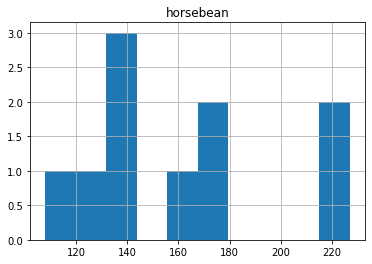

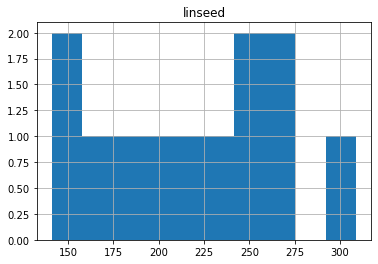

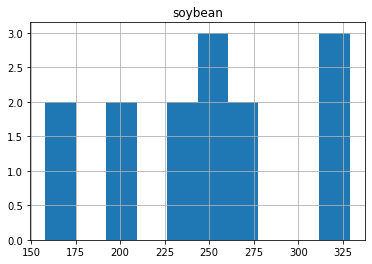

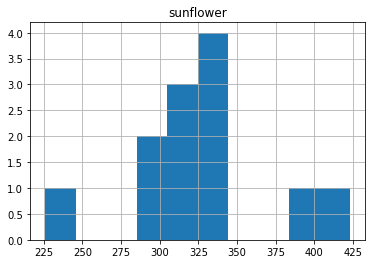

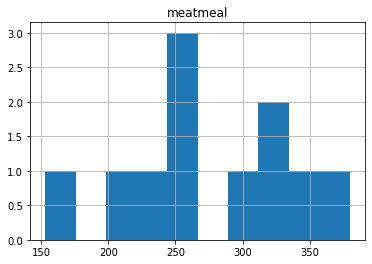

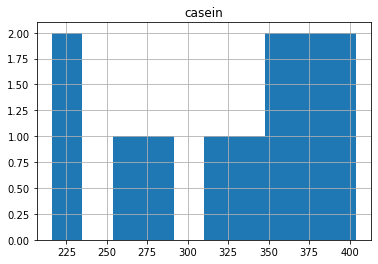

In [16]:
for x in dataframe_collection:
    dataframe_collection[x]['weight'].hist()
    plt.title(x)
    plt.show()

# Groupby

In [18]:
import numpy as np
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one','two','one','two','one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.853488,-0.490709
1,a,two,1.090078,-0.239675
2,b,one,-0.467812,-0.286641
3,b,two,-0.760625,0.769027
4,a,one,-0.129053,1.624818


groupby key1

In [19]:
grouped = df['data1'].groupby(df['key1'])
grouped

always with aggregation

In [20]:
grouped.mean()

key1
a    0.604838
b   -0.614218
Name: data1, dtype: float64

# Groupby 2 keys

In [21]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()

In [22]:
means

key1  key2
a     one     0.362218
      two     1.090078
b     one    -0.467812
      two    -0.760625
Name: data1, dtype: float64

In [23]:
means.unstack()

key2,one,two
key1,,
a,0.362218,1.090078
b,-0.467812,-0.760625
